In [50]:

import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("greenhouse.csv")



df.rename({"country_or_area": "country"}, axis=1, inplace=True)



In [4]:
df.head()

,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [5]:
df.isna().sum()

country     0
year        0
value       0
category    0
dtype: int64

In [6]:
le = LabelEncoder()
df["country_encoded"] = le.fit_transform(df["country"])

df.head()

,country,year,value,category,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
 4   country_encoded  8406 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.5+ KB


In [9]:
df.corr()

,year,value,country_encoded
year,1.00000,-0.012480,-0.004220
value,-0.01248,1.000000,0.104731
country_encoded,-0.00422,0.104731,1.000000


In [12]:
X = df.drop(["country", "year", "country_encoded", "category"], axis=1)
y = df["country_encoded"].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
pred = model.predict(X_test)

In [16]:
print ("Accuracy: {} %".format(model.score(Y_test, pred) * 100))

Accuracy: 1.8430439952437574 %


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

model.fit(X_train, Y_train)



/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_46652/3482753322.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10)

In [19]:
pred = model.predict(X_test)


In [20]:
print (model.score(Y_test, pred) * 100)

1.4863258026159334


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
df.head()

,country,year,value,category,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0


In [56]:
# I need to create separate datasets for each country
std = StandardScaler()
df["value_scaled"] = std.fit_transform(df["value"].values.reshape(-1,1))


df.head()

,country,year,value,category,country_encoded,value_scaled
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538


In [59]:
df.head()



,country,year,value,category,country_encoded,value_scaled
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538


In [61]:
df["factor"] = df.value / df.value_scaled



0       1.685227e+06
1       1.667790e+06
2       1.626741e+06
3       1.638188e+06
4       1.627815e+06
            ...     
8401   -2.327409e+03
8402   -2.302689e+03
8403   -2.253413e+03
8404   -2.223855e+03
8405   -1.148662e+03
Name: factor, Length: 8406, dtype: float64


In [33]:
print (df.country.unique())

['Australia' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'European Union' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Monaco'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'United States of America']


In [32]:
from sklearn.

Index(['country', 'year', 'value', 'category', 'country_encoded'], dtype='object')

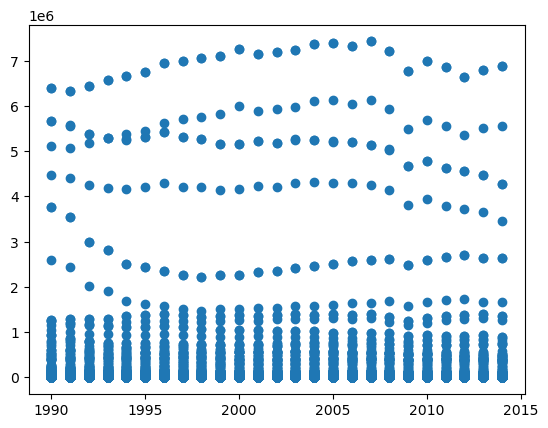